# Import library and Datasets

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataframe options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)

In [150]:
# load 2025 survey data
df_2025 = pd.read_csv('./stack-overflow-developer-survey-2025/survey_results_public.csv')

# Explore Dataset

In [151]:
# print the shape of the dataframe
print(f"2025 survey data shape: {df_2025.shape}")

2025 survey data shape: (49123, 170)


The 2025 stackoverflow survey has around 49000 survey participants and contains 170 features.

In [152]:
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 170 columns):
 #    Column                                    Non-Null Count  Dtype  
---   ------                                    --------------  -----  
 0    ResponseId                                49123 non-null  int64  
 1    MainBranch                                49123 non-null  object 
 2    Age                                       49123 non-null  object 
 3    EdLevel                                   48087 non-null  object 
 4    Employment                                48277 non-null  object 
 5    EmploymentAddl                            44820 non-null  object 
 6    WorkExp                                   42844 non-null  float64
 7    LearnCodeChoose                           46801 non-null  object 
 8    LearnCode                                 33516 non-null  object 
 9    LearnCodeAI                               45153 non-null  object 
 10   AILearnHow          

The data consist various data types, and some columns have missing data

In [153]:
df_2025.head(5)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na

## Business Understanding 

Each column in the dataset corresponds to a specific characteristic, such as age, education level, salary, tech stack,<br>
work experience, years coding, and industry of the respondent.<br><br>
By analyzing these features, we can directly identify the required skills for data scientists in the current market,<br>
and subsequently recommend that data science students focus on gaining experience in relevant industry domains.

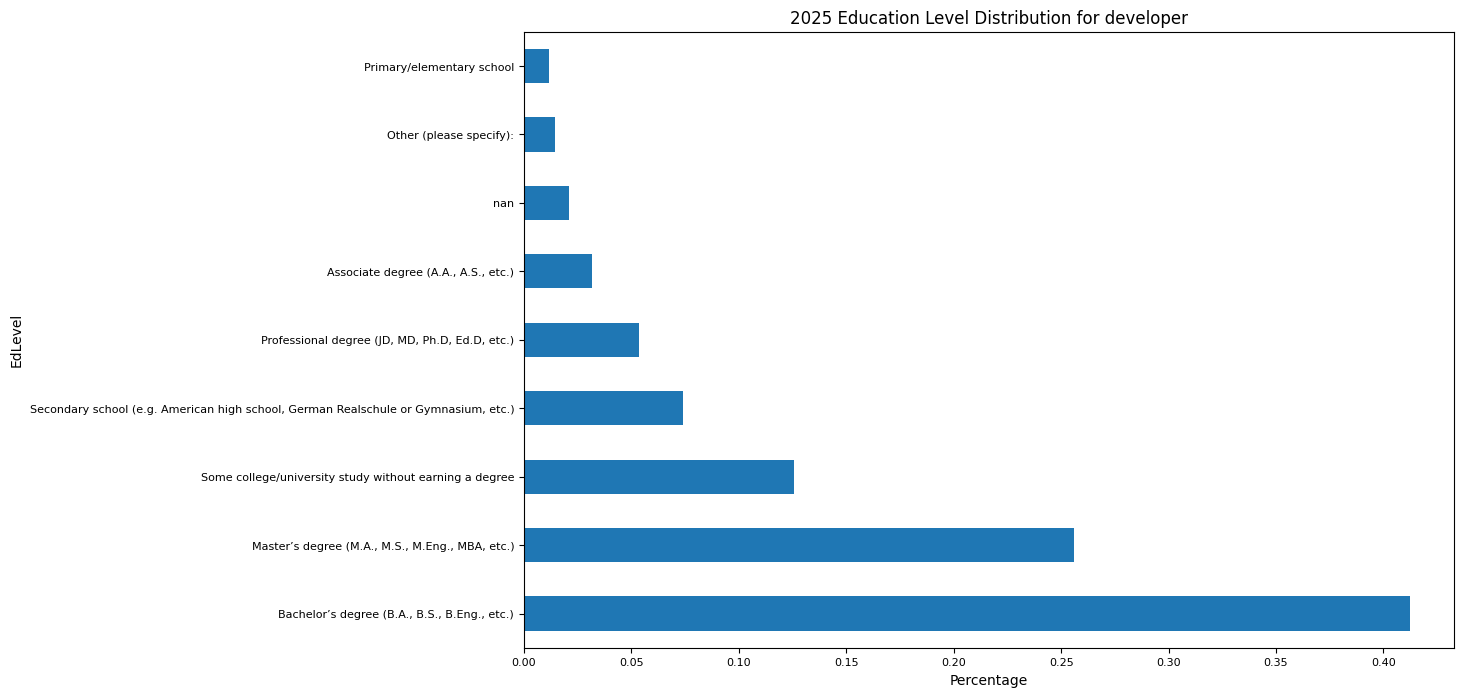

In [154]:
# Bar chart of education level distribution
df_2025.EdLevel.value_counts(normalize=True, dropna=False).plot(kind="barh",
                                                  title="2025 Education Level Distribution for developer",
                                                  figsize=(12,8),
                                                  fontsize=8,
                                                  xlabel="Percentage");

Most developer have bachelor's degree or above.

## Survey devType

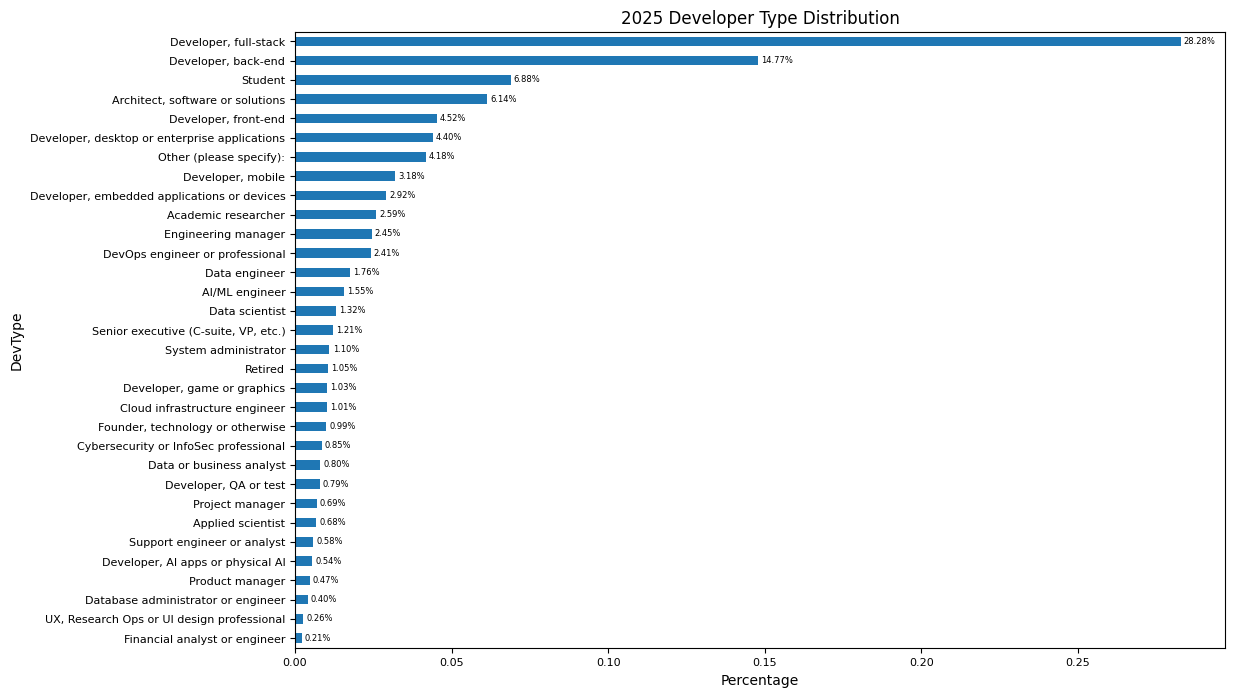

In [155]:
devtype = df_2025.DevType.value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(12,8))
devtype.plot(kind="barh", ax=ax, title="2025 Developer Type Distribution", xlabel="Percentage", fontsize=8);
for i, v in enumerate(devtype):
    ax.text(v + 0.001, i + 0.1, f"{v:.2%}", color='black', fontsize=6)
ax.invert_yaxis();

fig.savefig("2025_devtype_distribution.png", dpi=300, bbox_inches='tight')

Most developers are full-stack or back-end, and students make up the third largest group in the survey, which is quite surprising.

## Income in USD base one DevType

Developers come from different countries, and their salaries are reported in various currencies. Let’s convert them to USD.

In [156]:
# use first part of the string as currency
import re
def get_currency(currency_str):
    '''Extract the first three uppercase letters from the currency string 
    if it exists, otherwise return NaN.
    '''
    if pd.isna(currency_str):
        return np.nan
    currency_str = currency_str.strip()
    currency_str = re.sub(r'[^A-Z ]', '', currency_str)
    currency_str =currency_str[:3]
    return currency_str if len(currency_str) == 3 else np.nan

df_2025.Currency = df_2025.Currency.apply(lambda x: get_currency(x))

In [157]:
df_2025[['Currency', 'CompTotal']].head()

,Currency,CompTotal
0,EUR,52800.0
1,EUR,90000.0
2,UAH,2214000.0
3,EUR,31200.0
4,USD,60000.0


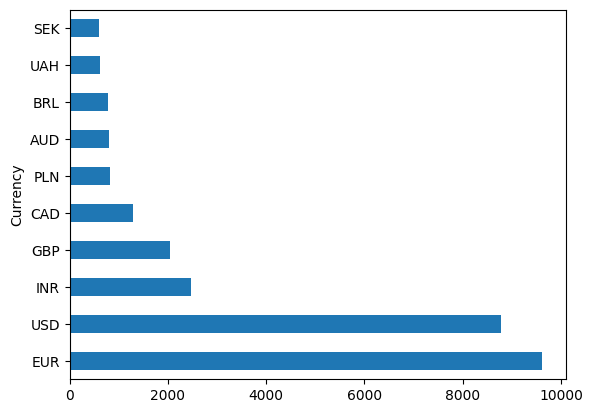

In [158]:
df_2025.Currency.value_counts().head(10).plot(kind="barh");

Most developers use EUR or USD.

In [159]:
import yfinance as yf
from functools import lru_cache

@lru_cache(maxsize=128)
def get_fx_rate(pair: str) -> float:
    '''get foreign exchange rate for the given pair, e.g. "USDCNY=X"'''
    try :
        ticker = yf.Ticker(pair)
        data = ticker.history(period="1d")
        return round(data["Close"].iloc[-1],2)
    except IndexError:
        return np.nan

get_fx_rate("USDCNY=X")

np.float64(7.12)

In [160]:
# get their income in USD
df_2025['income_usd'] = df_2025.apply(
    lambda row: row.CompTotal * get_fx_rate(f"{row.Currency}USD=X") if not pd.isna(row.Currency) and row.CompTotal > 0 else np.nan,
    axis=1
)

$KGSUSD=X: possibly delisted; no price data found  (period=1d)
$IMPUSD=X: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
$BTNUSD=X: possibly delisted; no price data found  (period=1d)


In [161]:
df_2025['income_usd'].head()

0     61776.0
1    105300.0
2     44280.0
3     36504.0
4     60000.0
Name: income_usd, dtype: float64

In [162]:
df_2025['income_usd'].describe()

count    2.407900e+04
mean     2.307220e+70
std      3.580208e+72
min      0.000000e+00
25%      3.510000e+04
50%      7.500000e+04
75%      1.200826e+05
max      5.555556e+74
Name: income_usd, dtype: float64

we have successfully converted their income to USD, but we got some outlies here.

Actually, There is a column already covert compensation to USD `ConvertedCompYearly`. Let's use this column instead.

In [163]:
def remove_outliers(series: pd.Series) -> pd.Series:
    '''remove outliers using 1.5*IQR rule'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.where((series >= lower_bound) & (series <= upper_bound))

In [164]:
# remove outliers
df_2025['ConvertedCompYearly'] = remove_outliers(df_2025['ConvertedCompYearly'])

In [165]:
df_2025['ConvertedCompYearly'].describe()

count     22867.000000
mean      79595.501071
std       56328.247155
min           1.000000
25%       36000.000000
50%       71929.000000
75%      115000.000000
max      244000.000000
Name: ConvertedCompYearly, dtype: float64

The average salary looks normal now. Let's see the salary distribution of different devType.

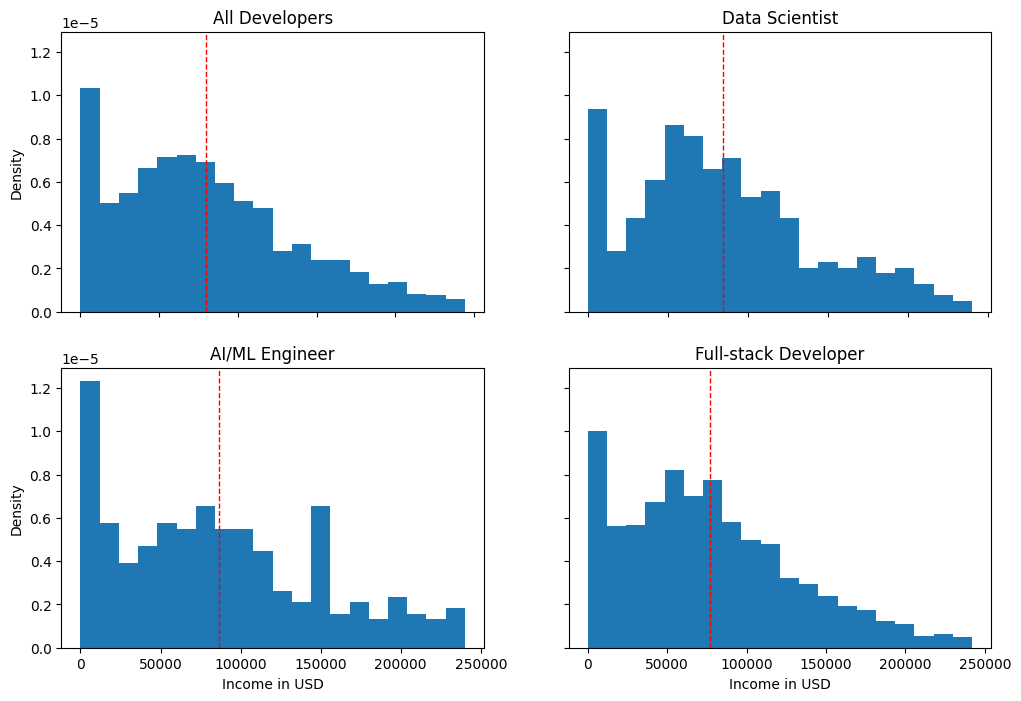

In [166]:
fig, ax = plt.subplots(2,2, figsize=(12,8), sharey=True)

def plot_income_distribution(dataframe, ax, title, filter = None):
    if filter is not None:
        dataframe = dataframe[filter]
    income = dataframe['ConvertedCompYearly'].dropna()
    income.plot(kind='hist', bins = 20, ax=ax, title=title, density=True)
    mean_income = income.mean()
    ax.axvline(mean_income, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Mean: ${mean_income:,.0f}')
    ax.set_xlabel("Income in USD")
    ax.set_ylabel("Density")
    ax.label_outer()
plot_income_distribution(df_2025, ax[0,0], "All Developers")
plot_income_distribution(df_2025, ax[0,1], "Data Scientist", filter = df_2025.DevType == 'Data scientist')
plot_income_distribution(df_2025, ax[1,0], "AI/ML Engineer", filter = df_2025.DevType == 'AI/ML engineer')
plot_income_distribution(df_2025, ax[1,1], "Full-stack Developer", filter = df_2025.DevType == "Developer, full-stack");

fig.savefig(('income_usd_devtype.png'), dpi=300, bbox_inches='tight')

The red vertical line indicates the average salary. It appears that Data Scientists earn slightly more than Full-Stack Developers. However, all devType have high unemployment rate worldwide.

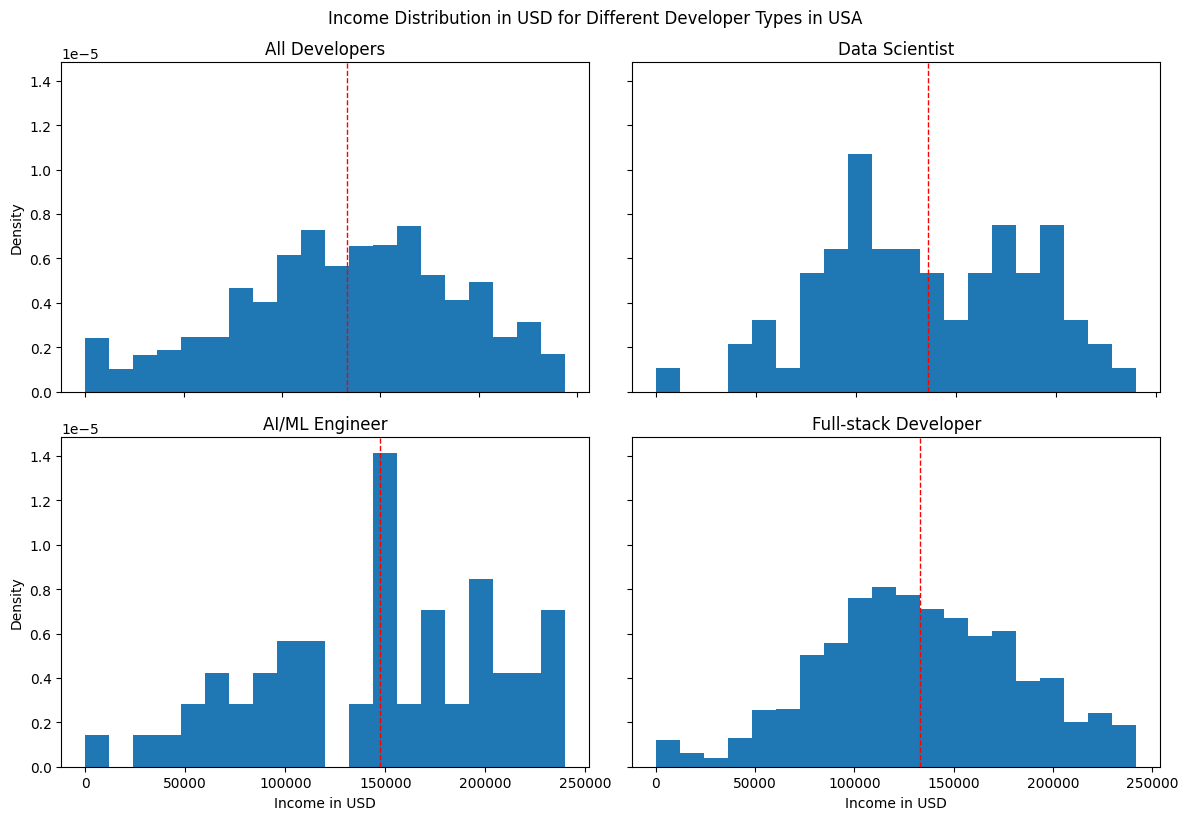

In [167]:
# let's focus on USA
fig, ax = plt.subplots(2,2, figsize=(12,8), sharey=True)
df_usa = df_2025[df_2025.Country == 'United States of America']
def plot_income_distribution(dataframe, ax, title, filter = None):
    if filter is not None:
        dataframe = dataframe[filter]
    income = dataframe['ConvertedCompYearly'].dropna()
    income.plot(kind='hist', bins = 20, ax=ax, title=title, density=True)
    mean_income = income.mean()
    ax.axvline(mean_income, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Mean: ${mean_income:,.0f}')
    ax.set_xlabel("Income in USD")
    ax.set_ylabel("Density")
    ax.label_outer()
plot_income_distribution(df_usa, ax[0,0], "All Developers")
plot_income_distribution(df_usa, ax[0,1], "Data Scientist", filter = df_usa.DevType == 'Data scientist')
plot_income_distribution(df_usa, ax[1,0], "AI/ML Engineer", filter = df_usa.DevType == 'AI/ML engineer')
plot_income_distribution(df_usa, ax[1,1], "Full-stack Developer", filter = df_usa.DevType == "Developer, full-stack");
fig.tight_layout()
fig.suptitle("Income Distribution in USD for Different Developer Types in USA", y=1.02)
fig.savefig(('income_usd_devtype_in_US.png'), dpi=300, bbox_inches='tight')

In the US, the unemployment rate is low, and the salary distribution is roughly bell-shaped.

## Education level for Data Scientist

Let's focus on the Data Scientist.

In [168]:
# filter data scientist with work experience >= 1 year
df_ds = df_2025[df_2025.DevType == "Data scientist"].copy()
df_ds = df_ds[df_ds.WorkExp >= 1]

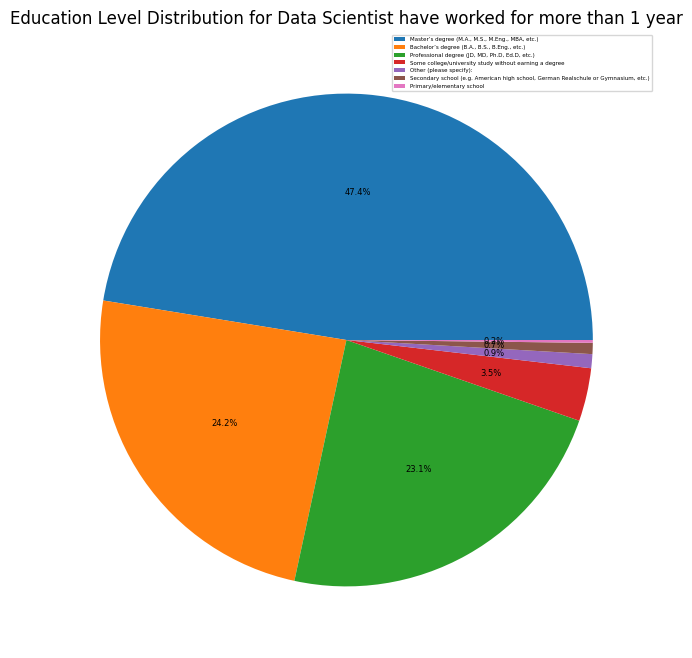

In [169]:
# drow a pie chart of education level distribution
ax = df_ds.EdLevel.value_counts().plot(
    kind="pie",
    title="Education Level Distribution for Data Scientist have worked for more than 1 year",
    
    labels=None,
    autopct='%1.1f%%',
    fontsize=6,
    figsize=(16,8),
)
ax.set_ylabel('')
ax.legend(
    loc='upper right', 
    labels=df_ds.EdLevel.value_counts().index.tolist(),
    fontsize=4
);

ax.figure.savefig("education_level_data_scientist.png", dpi=300, bbox_inches='tight')


Most Data Scientists hold a Master’s degree rather than a Bachelor’s degree. Compared to the previous education-level plot, where Bachelor’s degree was the majority.

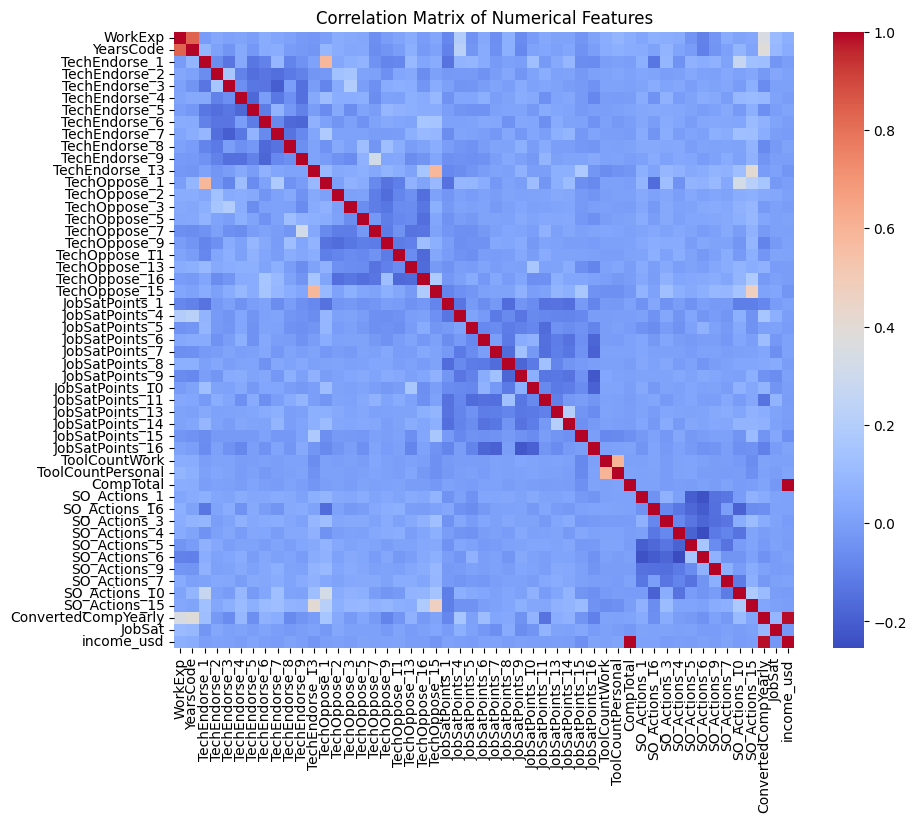

In [170]:
num_col_corr = df_2025.select_dtypes(include='float64').corr()
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(num_col_corr, cmap='coolwarm', cbar=True,
            xticklabels=num_col_corr.columns, 
            yticklabels=num_col_corr.columns)
plt.title("Correlation Matrix of Numerical Features");


We can’t really see the correlation of total Compensation with other features from the heatmap.

## Data Preparation

In [171]:
# get a copy of the dataframe filter for data scientists
df_ds = df_2025[df_2025.DevType == "Data scientist"].copy().reset_index(drop=True)

# select relevant columns for the analysis
df_ds = df_ds[
    [
        "EdLevel",
        "WorkExp",
        "YearsCode",
        "LanguageHaveWorkedWith",
        "DatabaseHaveWorkedWith",
        "PlatformHaveWorkedWith",
        "OrgSize",
        "Industry",
        "Country",
        "ConvertedCompYearly",
    ]
]

# drop rows with missing values in ConvertedCompYearly
df_ds = df_ds.dropna(
    subset="ConvertedCompYearly",
    axis=0,
)
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 2 to 572
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EdLevel                 329 non-null    object 
 1   WorkExp                 321 non-null    float64
 2   YearsCode               326 non-null    float64
 3   LanguageHaveWorkedWith  309 non-null    object 
 4   DatabaseHaveWorkedWith  259 non-null    object 
 5   PlatformHaveWorkedWith  240 non-null    object 
 6   OrgSize                 303 non-null    object 
 7   Industry                318 non-null    object 
 8   Country                 329 non-null    object 
 9   ConvertedCompYearly     329 non-null    float64
dtypes: float64(3), object(7)
memory usage: 28.3+ KB


The dataset now contains only 329 records, and some columns have missing values and need to be transformed into numerical form.

In [172]:
# define feature matrix X and target vector y
X = df_ds.drop('ConvertedCompYearly', axis=1)
y = df_ds['ConvertedCompYearly']

### transform categorical data

In [173]:
# one-hot encode categorical variables with multiple selections
# and count the number of selections
languageOneHotEncode = (
    pd.get_dummies(X["LanguageHaveWorkedWith"].str.split(";").explode(), prefix='Lang_')
    .groupby(level=0)
    .sum()
)
PlatformOneHotEncode = (
    pd.get_dummies(X["PlatformHaveWorkedWith"].str.split(";").explode(), prefix='Platform_')
    .groupby(level=0)
    .sum()
)
DataBaseOneHotEncode = (
    pd.get_dummies(X["DatabaseHaveWorkedWith"].str.split(";").explode(),prefix='DB_')
    .groupby(level=0)
    .sum()
)

Languages = X['LanguageHaveWorkedWith'].apply(lambda x: len(str(x).split(";")))
Platforms = X['PlatformHaveWorkedWith'].apply(lambda x: len(str(x).split(";")))
Databases = X['DatabaseHaveWorkedWith'].apply(lambda x: len(str(x).split(";")))


X = pd.concat(
    [
        X.drop(["LanguageHaveWorkedWith", "PlatformHaveWorkedWith", "DatabaseHaveWorkedWith"], axis=1),
        languageOneHotEncode,
        PlatformOneHotEncode,
        DataBaseOneHotEncode,
        Languages,
        Platforms,
        Databases,
    ],
    axis=1,
)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 2 to 572
Data columns (total 117 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    EdLevel                              329 non-null    object 
 1    WorkExp                              321 non-null    float64
 2    YearsCode                            326 non-null    float64
 3    OrgSize                              303 non-null    object 
 4    Industry                             318 non-null    object 
 5    Country                              329 non-null    object 
 6    Lang__Ada                            329 non-null    int64  
 7    Lang__Assembly                       329 non-null    int64  
 8    Lang__Bash/Shell (all shells)        329 non-null    int64  
 9    Lang__C                              329 non-null    int64  
 10   Lang__C#                             329 non-null    int64  
 11   Lang__C++             

We have performed one-hot encoding, which allows us to use the categorical data in our model.

In [174]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### handle missing data

In [175]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# define a pipeline for education level
# specify the order of education levels
order = [
    "Other (please specify):",
    'Primary/elementary school',
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
    "Some college/university study without earning a degree",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)",
]
encoder = OrdinalEncoder(categories=[order], dtype=int)

ed_pipeline = Pipeline(steps=[
    ('OrdinalEncoder', encoder),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
ed_pipeline

,steps,"[('OrdinalEncoder', ...), ('imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,categories,"[['Other (please specify):', 'Primary/elementary school', ...]]"
,dtype,<class 'int'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [176]:
from sklearn.preprocessing import PolynomialFeatures

# define a pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=2, include_bias=False)), # add polynomial features
    ('scaler', StandardScaler())
])

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [177]:
from sklearn.preprocessing import OneHotEncoder

# define a pipeline for categorical features
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "ohe",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
        )
    ]
)

cat_pipeline

,steps,"[('imputer', ...), ('ohe', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [178]:
from sklearn.compose import ColumnTransformer

col_Pipeline = ColumnTransformer(
    transformers=[
        ("edlevel", ed_pipeline, ["EdLevel"]),
        ("categorical", cat_pipeline, ["OrgSize", "Industry", "Country"]),
        ("numerical", num_pipeline, ["WorkExp", "YearsCode"]),
    ],
    remainder="passthrough",
)
col_Pipeline

,transformers,"[('edlevel', ...), ('categorical', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Other (please specify):', 'Primary/elementary school', ...]]"
,dtype,<class 'int'>
,handle_unknown,'error'


We have defined pipelines to handle missing data and preprocessing for specific columns:

- **ed_pipeline**: Applies ordinal encoding, imputes missing values with the most frequent category, and scales the education level column (`EdLevel`).
- **num_pipeline**: Imputes missing values using the median and scales numerical columns (`WorkExp`, `YearsCode`).
- **cat_pipeline**: Imputes missing values with the most frequent category and applies one-hot encoding for categorical columns (`OrgSize`, `Industry`, `Country`).

These pipelines are combined using a `ColumnTransformer` to ensure each column receives the appropriate preprocessing steps before modeling.

## Random Forest

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

# train a random forest model
rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", col_Pipeline),
        (
            "regressor",
            RandomForestRegressor(n_estimators=100, random_state=42)
        ),
    ]
)
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('edlevel', ...), ('categorical', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# evaluate the model
y_pred = rf_pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, rf_pipeline.predict(X_train))
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")

Train R2: 0.93
Test R2: 0.39


The Random Forest model shows signs of overfitting:

- **Train R²:** 0.93 (high)
- **Test R²:** 0.39 (much lower)

This gap indicates the model fits the training data well but does not generalize to unseen data. Overfitting can be reduced by:

- Reducing model complexity (e.g., lowering `max_depth`, increasing `min_samples_leaf`)
- Using fewer features or feature selection
- Applying regularization or trying simpler models (like Lasso)
- Collecting more data if possible

Fine-tuning hyperparameters and using cross-validation, as done with `GridSearchCV`, helps, but further regularization or feature engineering may be needed to improve generalization.

### fine tuning

In [181]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'regressor__max_depth': [2, 3, 5, 8, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10, 20],
    'regressor__min_samples_leaf': [5, 10, 20], 
    'regressor__n_estimators': [100, 200,300]
}


rf_grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [2, 3, ...], 'regressor__min_samples_leaf': [5, 10, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('edlevel', ...), ('categorical', ...), ...]"


In [182]:
from sklearn.metrics import r2_score

# Get the best parameters from grid search
best_params = rf_grid_search.best_params_

# Create a new RandomForestRegressor with the best parameters
final_rf = RandomForestRegressor(
    max_depth=best_params['regressor__max_depth'],
    min_samples_split=best_params['regressor__min_samples_split'],
    min_samples_leaf=best_params['regressor__min_samples_leaf'],
    n_estimators=best_params['regressor__n_estimators'],
    random_state=42
)

# Retrain pipeline on the full training set with best parameters
final_rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", col_Pipeline),
        ("regressor", final_rf)
    ]
)
final_rf_pipeline.fit(X_train, y_train)

# Evaluate the retrained pipeline

y_pred_final = final_rf_pipeline.predict(X_test)
train_r2_final = r2_score(y_train, final_rf_pipeline.predict(X_train))
test_r2_final = r2_score(y_test, y_pred_final)
print(f"Train R2: {train_r2_final:.2f}")
print(f"Test R2: {test_r2_final:.2f}")


Train R2: 0.73
Test R2: 0.37


After hyperparameter tuning with cross-validation, the Random Forest model's performance on the test set decreased slightly (Test R² dropped from 0.39 to 0.37), while the training R² increased (from 0.66 to 0.73). This suggests that although the model fits the training data better, it does not generalize as well to unseen data. 





In [ ]:

best_model = rf_grid_search.best_estimator_

rf = best_model.named_steps['regressor']
# get feature importances
importances = rf.feature_importances_

features_names = best_model[:-1].get_feature_names_out()

In [ ]:
# create a dataframe of feature importances
rf_features_df = pd.DataFrame({
    "features_name": features_names,
    "importances": importances
})
# sort by importances
rf_features_df.sort_values(by='importances', ascending=False).head(20)

,features_name,importances
69,categorical__Country_United States of America,0.388531
70,numerical__WorkExp,0.157537
71,numerical__YearsCode,0.137852
0,edlevel__EdLevel,0.047257
180,remainder__LanguageHaveWorkedWith,0.026196
129,remainder__Platform__Homebrew,0.023734
182,remainder__DatabaseHaveWorkedWith,0.019778
181,remainder__PlatformHaveWorkedWith,0.015121
172,remainder__DB__MySQL,0.013243
74,remainder__Lang__Bash/Shell (all shells),0.010512


The most important features identified by the Random Forest model include education level (`edlevel__EdLevel`), specific organization sizes (such as `categorical__OrgSize_10,000 or more employees`), and several technology-related features (like languages, platforms, and databases worked with). These features have the highest importances in predicting developer compensation.

## Lasso

In [ ]:
# let's try Lasso regression
lasso_pipeline = Pipeline(
    steps=[
        ("preprocessor", col_Pipeline),
        (
            "regressor",
            LassoCV(alphas=[1, 20, 50, 100, 500,1000, 2000], random_state=42, max_iter=20000)
        ),
    ]
)
lasso_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('edlevel', ...), ('categorical', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [186]:
y_pred = lasso_pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
train_r2 = r2_score(y_train, lasso_pipeline.predict(X_train))
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")


Train R2: 0.66
Test R2: 0.44


The Lasso regression model demonstrates better generalization than the Random Forest model. While Random Forest achieves a higher R² on the training set (indicating a strong fit to the training data), its test R² drops significantly, suggesting overfitting. In contrast, Lasso's train and test R² scores are closer, indicating less overfitting and better generalization to unseen data. This is likely due to Lasso's regularization, which penalizes model complexity and helps prevent overfitting, especially with a limited dataset.

In [ ]:
lasso_preprocess = lasso_pipeline[:-1]

# get feature names
lasso_features = lasso_preprocess.get_feature_names_out()
lasso = lasso_pipeline.named_steps['regressor']

# create a dataframe of feature importances
lasso_features_df = pd.DataFrame({
    "feature": lasso_features,
    "coef": lasso.coef_,
    "abs_coef": np.abs(lasso.coef_)
})

In [191]:
lasso_features_df.sort_values(by='coef', ascending=False).head(20)

,feature,coef,abs_coef
69,categorical__Country_United States of America,60738.052167,60738.052167
31,categorical__Country_Canada,22848.401564,22848.401564
151,remainder__Platform__Yarn,21138.618289,21138.618289
64,categorical__Country_Switzerland,17536.741666,17536.741666
70,numerical__WorkExp,11770.089284,11770.089284
129,remainder__Platform__Homebrew,10050.236462,10050.236462
68,categorical__Country_United Kingdom of Great B...,8519.392902,8519.392902
178,remainder__DB__Snowflake,8509.265701,8509.265701
2,"categorical__OrgSize_10,000 or more employees",7791.225192,7791.225192
136,remainder__Platform__Netlify,7429.116234,7429.116234


The most influential factors for achieving a high salary include work experience and proficiency with technologies such as Snowflake, Netlify, Bash, and Docker.


In [192]:
lasso_features_df.sort_values(by='coef', ascending=False).tail(20)

,feature,coef,abs_coef
180,remainder__LanguageHaveWorkedWith,-221.310738,221.310738
182,remainder__DatabaseHaveWorkedWith,-1159.860829,1159.860829
174,remainder__DB__Oracle,-1573.171069,1573.171069
175,remainder__DB__PostgreSQL,-1619.681174,1619.681174
23,categorical__Industry_Software Development,-1959.511016,1959.511016
6,categorical__OrgSize_500 to 999 employees,-2189.900448,2189.900448
90,remainder__Lang__Java,-3835.722001,3835.722001
141,remainder__Platform__Pip,-3933.955431,3933.955431
14,categorical__Industry_Government,-4807.154107,4807.154107
172,remainder__DB__MySQL,-6747.944677,6747.944677
